In [50]:
## Libraries
import pandas as pd
from pandas_profiling import ProfileReport
import datetime
import numpy as np
from numpy import mean
from numpy import std
from scipy import stats
from scipy.stats import uniform, randint
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,accuracy_score
from sklearn.metrics import PrecisionRecallDisplay
import xgboost
from pprint import pprint
from sklearn.metrics import classification_report

## Importing the dataset

In [3]:
data = pd.read_csv('C:/Users/marcu/Jupyter/marketing_campaign.csv', sep='\t')
print("There are", len(data), "observations and", len(data.columns), "variables in the dataset.")
data.info()
data.head()

There are 2240 observations and 29 variables in the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 n

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
#%pip install -q pandas-profiling[notebook]==3.0.0

#profile = ProfileReport(data, title='Pandas Profiling Report')
#profile.to_widgets()

## Preprocessing

In [6]:
data.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [7]:
# Mean Imputation for Income variable
data['Income']=data['Income'].fillna(data['Income'].median())
data.isna().any() # There is no NA values.
# Dropping the variables Z_CostContact & Z_Revenue
data = data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [8]:
# Change date format
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])
data.Dt_Customer.describe()

C:\Users\marcu\AppData\Local\Temp/ipykernel_14836/4073343637.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.Dt_Customer.describe()


count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [9]:
data["Customer_date"]= (datetime.datetime.now()-data["Dt_Customer"]).dt.days
# Now, Customer_date is a numeric value where 0 represents today. As the date approaches today, the value of the variable approaches zero.
data[data.duplicated(['ID'])].size # There is no duplicate in dataset.

0

In [10]:
# Adding new variables
data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Accepted']= data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data["Purchases"]= data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

In [11]:
# Marital Status variable categories
data['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
# Renaming
data['Marital_Status'] = data['Marital_Status'].str.replace('Married', 'In relationship')
data['Marital_Status'] = data['Marital_Status'].str.replace('Together', 'In relationship')
data['Marital_Status'] = data['Marital_Status'].str.replace('Divorced', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Widow', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Absurd', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Alone', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('YOLO', 'Single')

In [13]:
data['Marital_Status'].value_counts() # In relationship=1444 & Single=796

In relationship    1444
Single              796
Name: Marital_Status, dtype: int64

In [14]:
# Education variable categories
data['Education'].value_counts()  

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [15]:
data['Education'] = data['Education'].str.replace('2n Cycle', 'Master')

# The 2nd cycle is considered as Master's degree.

In [16]:
#Age of customers today 

from datetime import datetime
data["Age"] = 2022-data["Year_Birth"]

In [17]:
# Variable which indicates how many members exist in the house

data["Family_Size"] = data["Marital_Status"].replace({"Single": 1, "In relationship":2})+ data["Kids"]

In [18]:
# Renaming columns
data = data.rename(columns={"MntFruits":"Fruits","MntWines": "Wines","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","MntMeatProducts":"Meat"})

In [19]:
# Removing some variables
data = data.drop(columns=['ID', 'Year_Birth', 'Kidhome', 'Dt_Customer', 'Teenhome'])

In [20]:
pd.set_option('display.max_columns', None) # too see all the columns
data.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_date,Kids,Expenses,Accepted,Purchases,Age,Family_Size
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,3702,0,1617,0,25,65,1
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2856,2,27,0,6,68,3
2,Graduation,In relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,3203,0,776,0,21,57,2
3,Graduation,In relationship,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2796,1,53,0,8,38,3
4,PhD,In relationship,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,3052,1,422,0,19,41,3


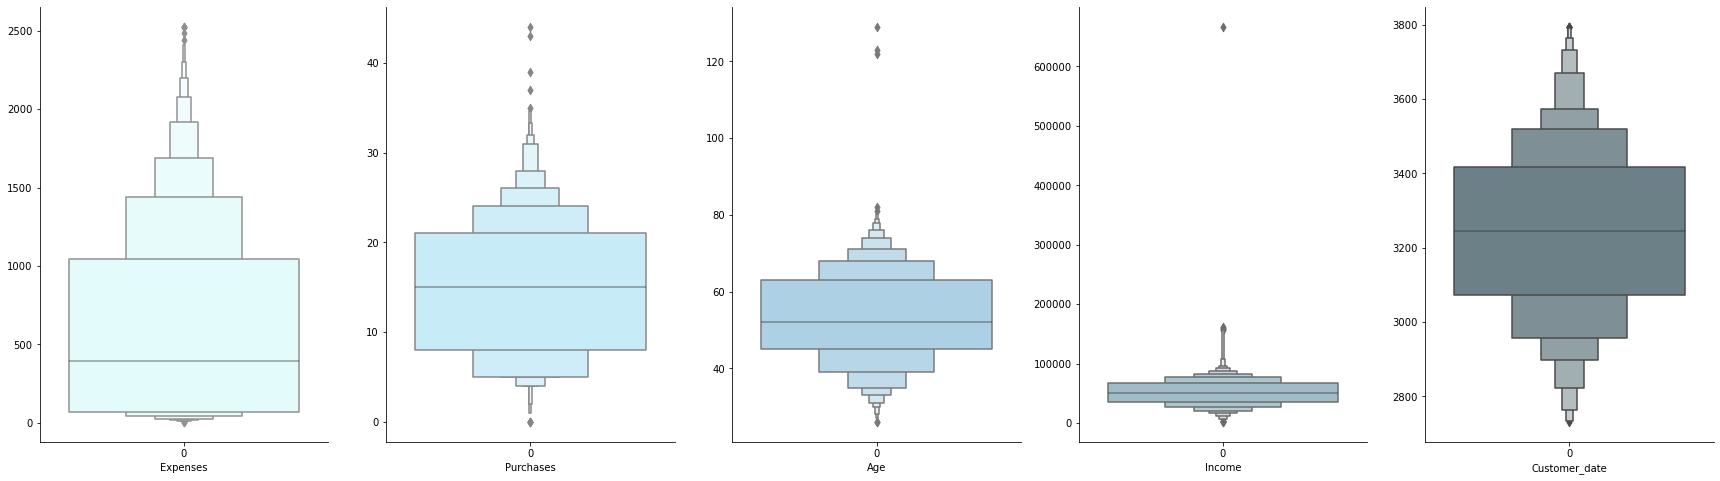

In [21]:
# Boxplots of different features
features= ["Expenses", "Purchases", "Age", "Income", "Customer_date"]
palette = ["#E0FFFF","#BFEFFF","#A4D3EE","#9AC0CD","#68838B"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()

In [22]:
# Income
data = data[(np.abs(stats.zscore(data['Income'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])

In [23]:
# Age
data = data[(np.abs(stats.zscore(data['Age'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])

In [24]:
# Purchases
data = data[(np.abs(stats.zscore(data['Purchases'])) < 3)]
# Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                         
# Reset index
data = data.drop(columns=['index'])

In [25]:
label_encoder = preprocessing.LabelEncoder()
encoder= LabelEncoder()
data["Education"]= data[["Education"]].apply(encoder.fit_transform)
data["Marital_Status"]= data[["Marital_Status"]].apply(encoder.fit_transform)
data = pd.get_dummies(data, columns = ['Marital_Status'])

In [26]:
data_list = list(data.columns)

## Splitting the data into training and test set

In [27]:
data_presplit = data.copy()
data_target = data["Response"]
data_train, data_test, target_train, target_test = train_test_split(
    data, data_target,test_size=0.2, random_state=42, stratify=data_target)
print("=======TRAIN=========")
display(data_train)
display(target_train)
len(data_train)

=======TRAIN=========


,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_date,Kids,Expenses,Accepted,Purchases,Age,Family_Size,Marital_Status_0,Marital_Status_1
308,1,51381.5,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,0,3371,0,1611,2,24,33,2,1,0
550,3,54880.0,57,308,85,137,102,45,118,2,6,2,11,5,0,0,0,0,0,0,0,3433,1,795,0,21,44,2,0,1
2141,1,40590.0,30,154,0,50,6,11,37,5,3,4,3,6,1,0,0,0,0,0,0,3395,2,258,1,15,53,3,0,1
1271,1,78687.0,13,817,185,687,145,55,241,1,4,6,8,2,0,0,1,0,0,0,1,3550,0,2130,1,19,39,2,1,0
1154,1,80685.0,55,241,45,604,34,26,54,1,6,4,10,2,0,0,0,0,0,0,0,3567,0,1004,0,21,28,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2,35178.0,10,23,1,13,2,2,18,1,1,1,2,7,1,0,0,0,0,0,1,3162,1,59,1,5,51,3,1,0
95,1,47916.0,72,505,0,26,0,0,75,5,7,4,6,6,0,1,0,0,0,0,0,3475,1,606,1,22,62,2,0,1
65,1,32474.0,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2762,2,11,0,4,55,4,1,0
139,2,92859.0,46,962,61,921,52,61,20,1,5,4,12,2,0,0,0,0,0,0,0,3509,0,2077,0,22,30,1,0,1


308     0
550     0
2141    0
1271    1
1154    0
       ..
329     1
95      0
65      0
139     0
1523    1
Name: Response, Length: 1781, dtype: int64

1781

## Balancing the data

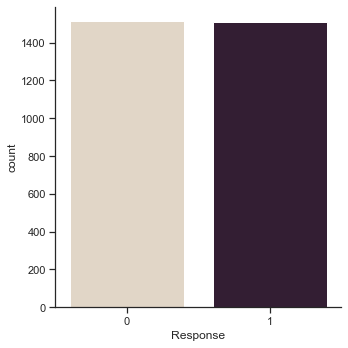

In [28]:
os = SMOTE(random_state=0, k_neighbors=5)
os = ADASYN(random_state=0,n_neighbors=5)
os_data,os_target =os.fit_resample(data_train, target_train)
sns.set_theme(style="ticks", color_codes=True)              
sns.catplot(x="Response", kind="count", palette="ch:.25", data=os_data)
os_data.groupby(['Response']).agg({'Response':'count'})
data_train = os_data
target_train = os_target

Deleting the "Response" columns from the data sets  

In [29]:
data_train = data_train.drop(columns='Response')
data_test = data_test.drop(columns='Response')

## First decision tree

Creating the first decision tree on the data

In [30]:
dt = DecisionTreeClassifier()
dt.fit(data_train, target_train)

DecisionTreeClassifier()

Note: you may need to restart the kernel to use updated packages.


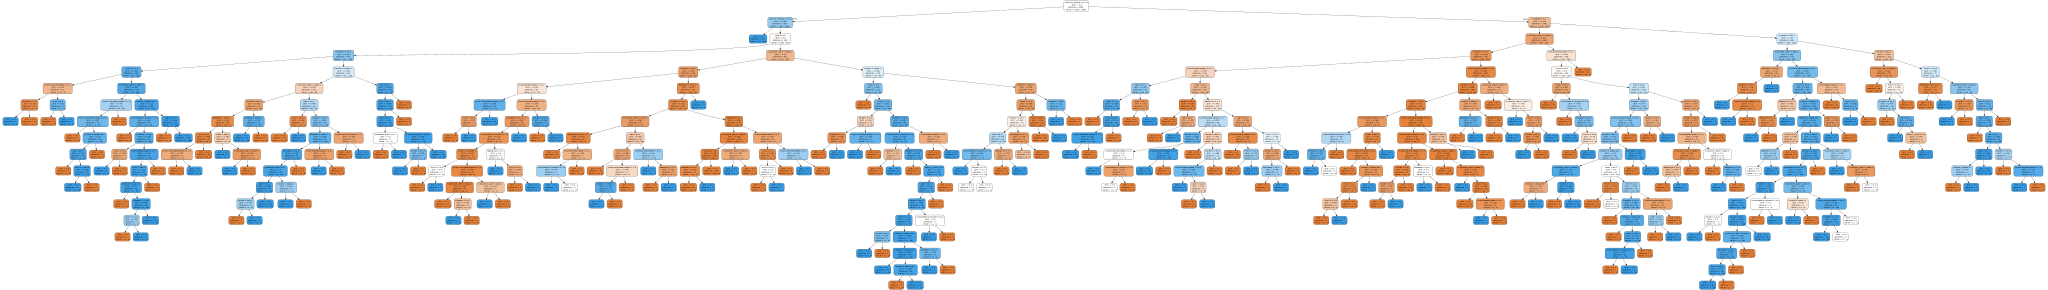

In [31]:
%pip install -q -U graphviz

import os
os.environ['PATH'] += ';C:\\Users\\marcu\\Jupyter\\Graphviz\\bin'
dt_visual = tree.export_graphviz(dt,
                                out_file=None, 
                                feature_names=data_train.columns,
                                filled=True, 
                                rounded=True, 
                                special_characters=True)

graph = graphviz.Source(dt_visual) 

display(graph)

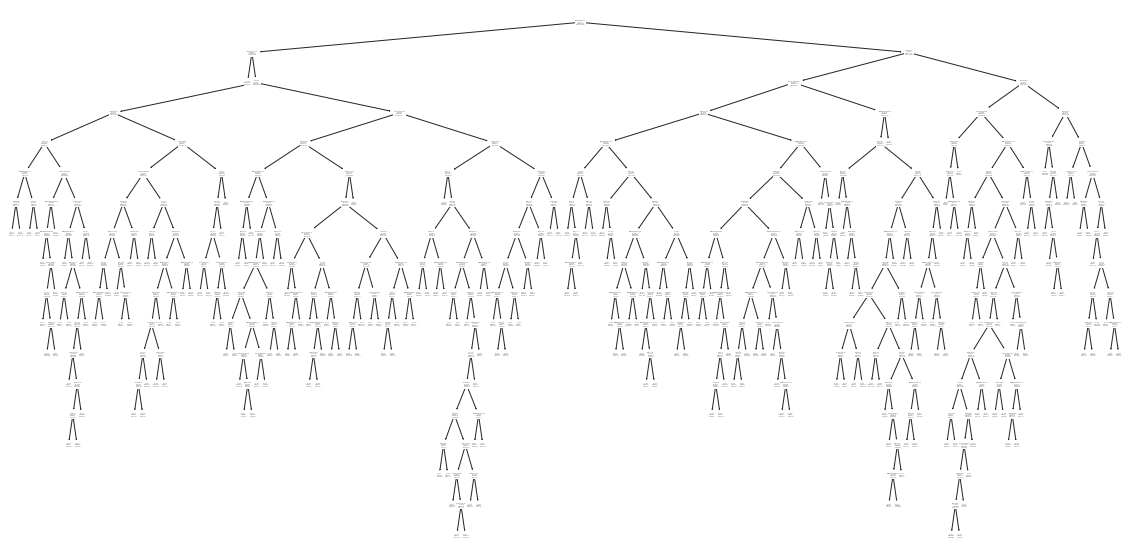

In [32]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt, 
               feature_names=data_train.columns)
plt.show()

## First random forest

Creating a random forest with the default values to get a first impression

In [33]:
data_firstrt = RandomForestClassifier()

data_firstrt.fit(data_train, target_train)

RandomForestClassifier()

Using both RepeatedStratifiedKFold and StratifiedKFold to see the differences

In [34]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(data_firstrt, data_train, target_train, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.936 (0.013)


In [35]:
cv2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy = cross_val_score(data_firstrt, data_train, target_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(accuracy), std(accuracy)))

Accuracy: 0.939 (0.011)


Predicting a single row in the data set

In [36]:
row = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
yhat = data_firstrt.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


C:\Users\marcu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Second random forest

In [37]:
data_rt=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
data_rt.fit(data_train,target_train)
target_pred=data_rt.predict(data_test)

Printing the error rate and score

In [38]:
print("Error:", metrics.mean_absolute_error(target_test, target_pred))

Error: 0.1210762331838565


In [39]:
data_rt.score(data_test,target_test)

0.8789237668161435

Creating a confusion matrix comparing the model with the test data

In [40]:
target_predict = data_rt.predict(data_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, target_predict)
cm

array([[356,  23],
       [ 31,  36]], dtype=int64)

Text(66.5, 0.5, 'Truth')

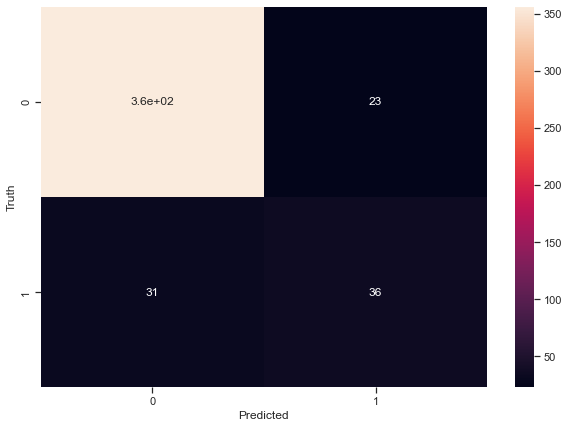

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Random Forest Hyperparameter Tuning

In [65]:
rf_best = RandomForestClassifier(random_state=42)
params = {
    'max_depth': [22,23,24,25,26,27,28,29,30],
    'min_samples_leaf': [1],
    'n_estimators': [745,746,747,748,749,750,751,752,753,754,755]
}
grid_search = GridSearchCV(estimator=rf_best,
                           param_grid=params,
                           verbose=0,
                           n_jobs=-1)

In [66]:
%%time
grid_search.fit(data_train,target_train)

Wall time: 2min 20s


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [22, 23, 24, 25, 26, 27, 28, 29, 30],
                         'min_samples_leaf': [1],
                         'n_estimators': [745, 746, 747, 748, 749, 750, 751,
                                          752, 753, 754, 755]})

In [67]:
grid_search.best_params_

{'max_depth': 24, 'min_samples_leaf': 1, 'n_estimators': 746}

In [68]:
grid_search.best_score_

0.927546384981665

Crossvalidation

In [69]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(rf_best, data_train, target_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.937 (0.011)


In [70]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=24, n_estimators=746, random_state=42)

Creating a confusion matrix based on the best random forest

Text(111.5, 0.5, 'Truth')

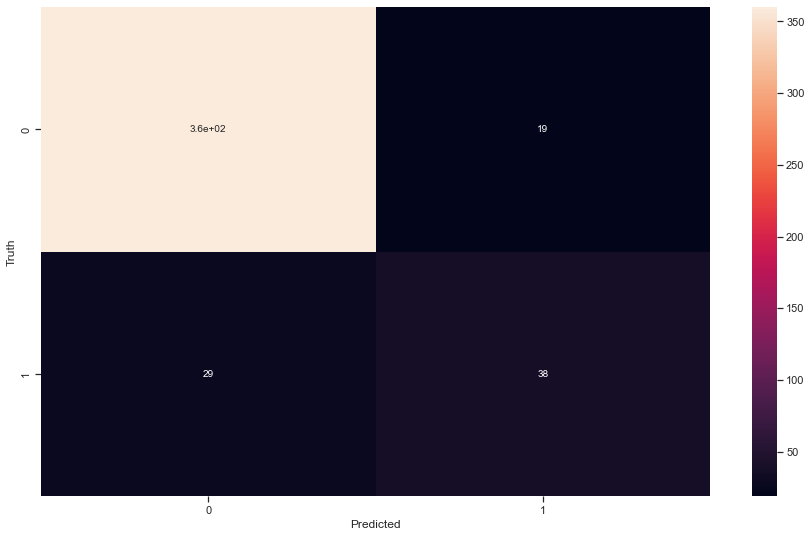

In [71]:
target_predict_best = rf_best.predict(data_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, target_predict_best)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(15,9))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using a confusion matrix preset from another Kaggle user

In [72]:
def print_confMat (y,predictions,graph):
  cm = confusion_matrix(y, predictions)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  recall_0 = (cm[0,0])/cm[0,:].sum()
  recall_1 = (cm[1,1])/cm[1,:].sum()
  precision_0 = (cm[0,0])/cm[:,0].sum()
  precision_1 = (cm[1,1])/cm[:,1].sum()
  f1_0 = 2*recall_0*precision_0/(recall_0+precision_0)
  f1_1 = 2*recall_1*precision_1/(recall_1+precision_1)
  text = 'Accuracy = '+"{:.2f}".format(accuracy)+'; '+'f1_0 = '+"{:.2f}".format(f1_0)+'; '+'f1_1 = '+"{:.2f}".format(f1_1)+'; '
  if graph:
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.grid(False); ax.set_title(text)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues,ax=ax)
    plt.show()
  else: return accuracy,f1_0,f1_1

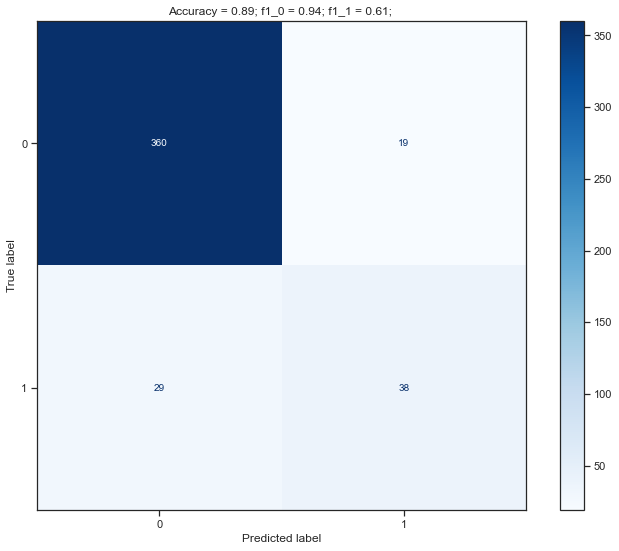

In [73]:
predictions = rf_best.predict(data_test)
print_confMat (target_test,predictions,graph=1)

In [74]:
errors = abs(predictions - target_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2))

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.11


ROC curve and AUC

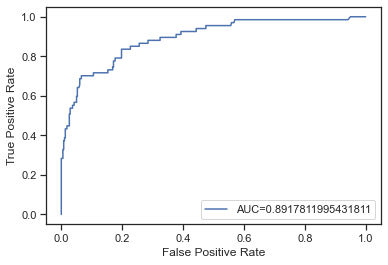

In [75]:
target_pred_proba = rf_best.predict_proba(data_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(target_test,target_pred_proba)
auc = metrics.roc_auc_score(target_test,target_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

2-class Precision-Recall curve

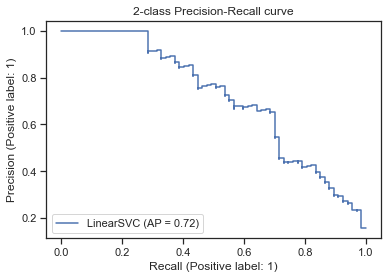

In [77]:
display = PrecisionRecallDisplay.from_estimator(
    rf_best, data_test, target_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Classification report

In [78]:
from sklearn.metrics import classification_report
print(classification_report(target_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       379
           1       0.67      0.57      0.61        67

    accuracy                           0.89       446
   macro avg       0.80      0.76      0.78       446
weighted avg       0.89      0.89      0.89       446



## Randomizing the random forest

In [42]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [43]:
rf_random = RandomizedSearchCV(estimator = data_rt, param_distributions = random_grid, n_iter = 100, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train,target_train)

RandomizedSearchCV(estimator=RandomForestClassifier(min_impurity_decrease=1e-07,
                                                    n_estimators=10, n_jobs=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [44]:
rf_random.best_params_

{'n_estimators': 800, 'min_samples_leaf': 1, 'max_depth': 30}

In [45]:
rf_random.best_score_

0.9278775108094794

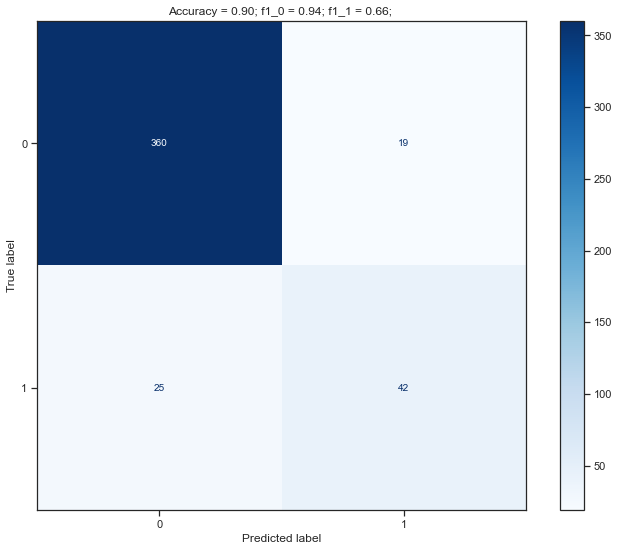

In [84]:
predictions = rf_random.predict(data_test)
print_confMat (target_test,predictions,graph=1)

In [85]:
errors = abs(predictions - target_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2))

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.1


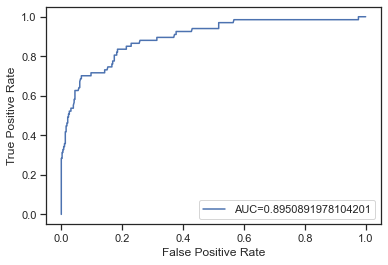

In [86]:
target_pred_proba = rf_random.predict_proba(data_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(target_test,target_pred_proba)
auc = metrics.roc_auc_score(target_test,target_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

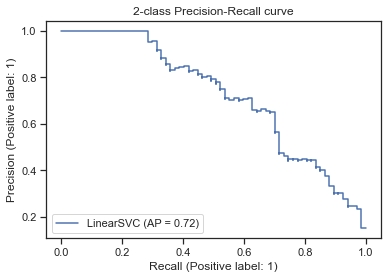

In [87]:
display = PrecisionRecallDisplay.from_estimator(
    rf_random, data_test, target_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [88]:
print(classification_report(target_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       379
           1       0.69      0.63      0.66        67

    accuracy                           0.90       446
   macro avg       0.81      0.79      0.80       446
weighted avg       0.90      0.90      0.90       446



## Feature Importance

In [79]:
#Feature Importance
feature_imp=pd.Series(rfc.feature_importances_).sort_values(ascending=False)
print(feature_imp[:10])

2     0.100227
27    0.073425
20    0.072833
8     0.067700
12    0.059969
1     0.057813
22    0.055649
5     0.047365
3     0.046816
28    0.041958
dtype: float64


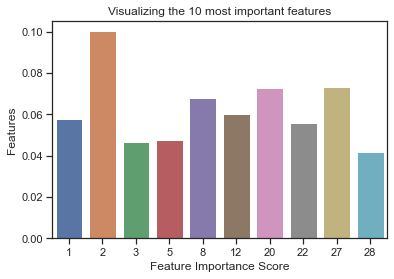

In [80]:
sns.barplot(x=feature_imp[:10].index, y=feature_imp[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing the 10 most important features")
#plt.legend()
plt.show()

List of all variable sorted by relevance

In [81]:
importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(data_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Recency              Importance: 0.1
Variable: Response             Importance: 0.073
Variable: Family_Size          Importance: 0.073
Variable: Gold                 Importance: 0.068
Variable: NumStorePurchases    Importance: 0.06
Variable: Income               Importance: 0.058
Variable: Kids                 Importance: 0.056
Variable: Wines                Importance: 0.047
Variable: Meat                 Importance: 0.047
Variable: Marital_Status_0     Importance: 0.042
Variable: Age                  Importance: 0.04
Variable: Expenses             Importance: 0.037
Variable: Purchases            Importance: 0.034
Variable: Fish                 Importance: 0.033
Variable: NumWebVisitsMonth    Importance: 0.032
Variable: Sweets               Importance: 0.031
Variable: Fruits               Importance: 0.03
Variable: Customer_date        Importance: 0.027
Variable: Accepted             Importance: 0.026
Variable: NumCatalogPurchases  Importance: 0.025
Variable: NumWebPurchases

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Cumulative importance of the attributes

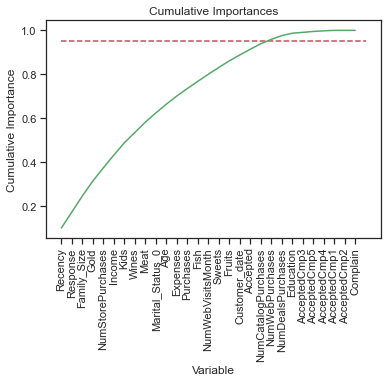

In [82]:
x_values = list(range(len(importances)))
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [83]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 21


## Random Forest XGBoost

In [65]:
#%pip install xgboost

xgb_model=xgboost.XGBClassifier(tree_method='gpu_hist', eval_metric="auc")

params={
    "learning_rate": uniform(0.03, 0.5),
    "max_depth": randint(15, 30),
    "gamma": uniform(0, 0.5),
    "n_estimators": randint(600, 800),}

xgb =RandomizedSearchCV(xgb_model,param_distributions=params,random_state=42,n_iter=10, n_jobs=6, return_train_score=True)

xgb.fit(data_train,target_train,eval_set=[(data_test, target_test)])

C:\Users\marcu\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marcu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marcu\anaconda3\lib\site-packages\xgboost\co

[0]	validation_0-auc:0.83340
[1]	validation_0-auc:0.84748
[2]	validation_0-auc:0.86130
[3]	validation_0-auc:0.85799
[4]	validation_0-auc:0.85730
[5]	validation_0-auc:0.86142
[6]	validation_0-auc:0.86006
[7]	validation_0-auc:0.86794
[8]	validation_0-auc:0.87282
[9]	validation_0-auc:0.87550
[10]	validation_0-auc:0.87489
[11]	validation_0-auc:0.87532
[12]	validation_0-auc:0.87697
[13]	validation_0-auc:0.87969
[14]	validation_0-auc:0.88198
[15]	validation_0-auc:0.87993
[16]	validation_0-auc:0.87961
[17]	validation_0-auc:0.88300
[18]	validation_0-auc:0.88249
[19]	validation_0-auc:0.88233
[20]	validation_0-auc:0.88408
[21]	validation_0-auc:0.88515
[22]	validation_0-auc:0.88715
[23]	validation_0-auc:0.88794
[24]	validation_0-auc:0.88877
[25]	validation_0-auc:0.88830
[26]	validation_0-auc:0.88900
[27]	validation_0-auc:0.88837
[28]	validation_0-auc:0.88834
[29]	validation_0-auc:0.88877
[30]	validation_0-auc:0.88912
[31]	validation_0-auc:0.88928
[32]	validation_0-auc:0.88995
[33]	validation_0-au

[268]	validation_0-auc:0.89727
[269]	validation_0-auc:0.89727
[270]	validation_0-auc:0.89727
[271]	validation_0-auc:0.89727
[272]	validation_0-auc:0.89727
[273]	validation_0-auc:0.89727
[274]	validation_0-auc:0.89727
[275]	validation_0-auc:0.89727
[276]	validation_0-auc:0.89727
[277]	validation_0-auc:0.89727
[278]	validation_0-auc:0.89727
[279]	validation_0-auc:0.89727
[280]	validation_0-auc:0.89727
[281]	validation_0-auc:0.89727
[282]	validation_0-auc:0.89727
[283]	validation_0-auc:0.89727
[284]	validation_0-auc:0.89727
[285]	validation_0-auc:0.89727
[286]	validation_0-auc:0.89727
[287]	validation_0-auc:0.89727
[288]	validation_0-auc:0.89727
[289]	validation_0-auc:0.89727
[290]	validation_0-auc:0.89727
[291]	validation_0-auc:0.89727
[292]	validation_0-auc:0.89727
[293]	validation_0-auc:0.89727
[294]	validation_0-auc:0.89727
[295]	validation_0-auc:0.89727
[296]	validation_0-auc:0.89727
[297]	validation_0-auc:0.89727
[298]	validation_0-auc:0.89727
[299]	validation_0-auc:0.89727
[300]	va

[533]	validation_0-auc:0.89727
[534]	validation_0-auc:0.89727
[535]	validation_0-auc:0.89727
[536]	validation_0-auc:0.89727
[537]	validation_0-auc:0.89727
[538]	validation_0-auc:0.89727
[539]	validation_0-auc:0.89727
[540]	validation_0-auc:0.89727
[541]	validation_0-auc:0.89727
[542]	validation_0-auc:0.89727
[543]	validation_0-auc:0.89727
[544]	validation_0-auc:0.89727
[545]	validation_0-auc:0.89727
[546]	validation_0-auc:0.89727
[547]	validation_0-auc:0.89727
[548]	validation_0-auc:0.89727
[549]	validation_0-auc:0.89727
[550]	validation_0-auc:0.89727
[551]	validation_0-auc:0.89727
[552]	validation_0-auc:0.89727
[553]	validation_0-auc:0.89727
[554]	validation_0-auc:0.89727
[555]	validation_0-auc:0.89727
[556]	validation_0-auc:0.89727
[557]	validation_0-auc:0.89727
[558]	validation_0-auc:0.89727
[559]	validation_0-auc:0.89727
[560]	validation_0-auc:0.89727
[561]	validation_0-auc:0.89727
[562]	validation_0-auc:0.89727
[563]	validation_0-auc:0.89727
[564]	validation_0-auc:0.89727
[565]	va

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_...
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E15A7D8EB0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E15A98F400>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E15ACD1160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E15ACD13A0>},
                   random_state=42, return_train_score=True)

In [70]:
xgb.best_params_

{'gamma': 0.10616955533913808,
 'learning_rate': 0.12091248360355031,
 'max_depth': 19,
 'n_estimators': 760}

In [71]:
xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.10616955533913808, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.12091248360355031,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=19,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=760, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [72]:
xgb.best_score_

0.916299053144327

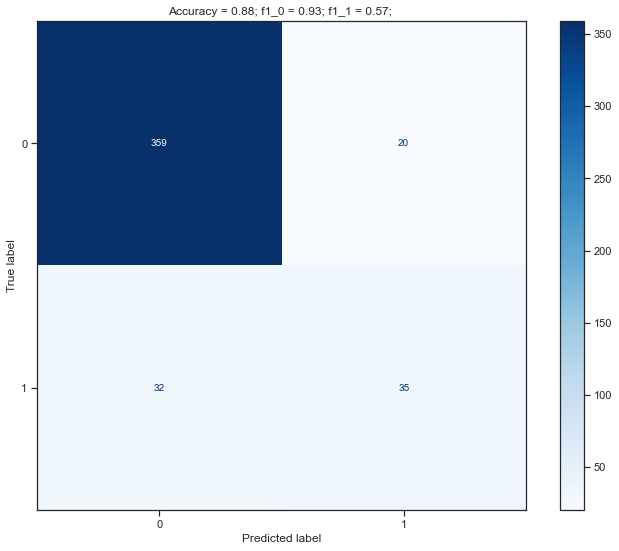

In [73]:
predictions = xgb.predict(data_test)
print_confMat (target_test,predictions,graph=1)

In [74]:
errors = abs(predictions - target_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2))

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.12


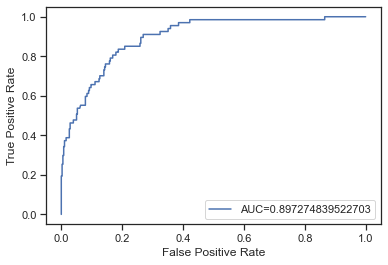

In [75]:
target_pred_proba = xgb.predict_proba(data_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(target_test,target_pred_proba)
auc = metrics.roc_auc_score(target_test,target_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

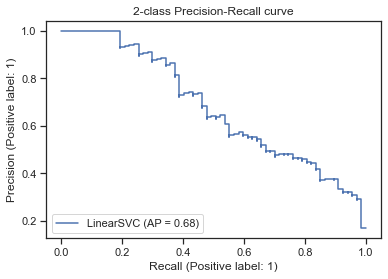

In [76]:
display = PrecisionRecallDisplay.from_estimator(
    xgb, data_test, target_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [77]:
from sklearn.metrics import classification_report
print(classification_report(target_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       379
           1       0.64      0.52      0.57        67

    accuracy                           0.88       446
   macro avg       0.78      0.73      0.75       446
weighted avg       0.88      0.88      0.88       446

